#Rasa NLU : Entity Extraction

What is the weather <b>tomorrow<b> in <b>Delhi<b>?

1. Binary Classifier is_entity and then entity_classifier
2. Direct Structured Prediction


In [1]:
#Installation
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.0 rasa_nlu[spacy];

# as well as install a language model:
!{python} -m spacy download en_core_web_md;
!{python} -m spacy link --force en_core_web_md en;


     |████████████████████████████████| 122kB 226kB/s eta 0:00:01
     |████████████████████████████████| 153kB 5.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/3b/f6/7a76333cf0b9251ecf49efff635015171843d9b977e4ffcf59f9c4428052/redis-2.10.6-py2.py3-none-any.whl
     |████████████████████████████████| 102kB 5.1MB/s ta 0:00:01
     |████████████████████████████████| 1.0MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 665kB 13.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
     |████████████████████████████████| 61kB 1.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/53/39/4ab213673844e0c004bed8a0781a0721a3f6bb23eb8854ee75c236428892/graphviz-0.8.4-py2.py3-none-any.whl
     |████████████████████████████████| 51kB 5.1MB/s eta 0:00:011
     |████████████████████████████████| 4.9MB 2.9MB/s eta 0:00:01


  Using cached https://files.pythonhosted.org/packages/77/de/47e35a97b2b05c2fadbec67d44cfcdcd09b8086951b331d82de90d2912da/jsonschema-2.6.0-py2.py3-none-any.whl
     |████████████████████████████████| 5.5MB 3.5MB/s eta 0:00:01
     |████████████████████████████████| 25.2MB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 204kB 4.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/76/ae/44b03b253d6fade317f32c24d100b3b35c2239807046a4c953c7b89fa49e/itsdangerous-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/37/45185cb5abbc30d7257104c434fe0b07e5a195a6847506c074527aa599ec/Click-7.0-py2.py3-none-any.whl
     |████████████████████████████████| 266kB 2.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/69/1b/b853c7a9d4f6a6d00749e94eb6f3a041e342a885b87340b79c1ef73e3a78/certifi-2019.6.16-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe722

     |████████████████████████████████| 5.7MB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 607kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f5/1d/c98a587dc06e107115cf4a58b49de20b19222c83d75335a192052af4c4b7/incremental-17.5.0-py2.py3-none-any.whl
     |████████████████████████████████| 51kB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 614kB 14.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 7.4MB/s eta 0:00:011
     |████████████████████████████████| 153kB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 194kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 757kB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 2.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ae/ae/bcb60402c60932b32dfaf19bb53870b29eda2cd17551ba5639219fb5ebf9/html5lib-0.9999999.tar.gz
  Using cached https://files.py

     |████████████████████████████████| 317kB 445kB/s eta 0:00:01
     |████████████████████████████████| 51kB 189kB/s eta 0:00:01
  Created wheel for slackclient: filename=slackclient-1.3.2-py2.py3-none-any.whl size=19228 sha256=1443c81b5fa1d0f913272f3dd08fb18f0537465cb982d7829ae76db2a959c91f
  Stored in directory: /home/dynamo/.cache/pip/wheels/3b/d4/92/3458f0e1a3e1a9c8935d3b2db89a75d74d8d45601fedec752f
  Created wheel for ConfigArgParse: filename=ConfigArgParse-0.13.0-cp36-none-any.whl size=17570 sha256=245ecb82c13511ad5267f498a3318a6e0098e5a7d1ec3d2fdcd61b2029565314
  Stored in directory: /home/dynamo/.cache/pip/wheels/76/11/eb/12113becd46c0e8a70b8a63f9405e46a1f61d4aaa8532d676b
  Created wheel for jsonpickle: filename=jsonpickle-0.9.6-cp36-none-any.whl size=29463 sha256=43a98acef85d5896b61a42778790661720fb42204331bfa4f0fbb13734209fed
  Stored in directory: /home/dynamo/.cache/pip/wheels/07/8b/41/8ce98f4737a9ff61b1bf2673f2abfe66a6a43ad6e91d2c9736
  Created wheel for simplejson: file

     |████████████████████████████████| 120.9MB 2.5MB/s eta 0:00:01    |█████▋                          | 21.2MB 2.8MB/s eta 0:00:36
  Created wheel for en-core-web-md: filename=en_core_web_md-2.0.0-cp36-none-any.whl size=122523223 sha256=4549867e4d50a90f2e802dd62210f84d4ab7bfc8c37d42d406b45003ecd33f44
  Stored in directory: /tmp/pip-ephem-wheel-cache-a9e4odd4/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md

    Linking successful
    /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/en_core_web_md
    -->
    /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')


    Linking successful
    /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/en_core_web_md
    -->
    /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [2]:
import rasa_nlu
import rasa_core
import spacy

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))
print("Loading spaCy language model...")
print(spacy.load("en")("Hello world!"))

rasa_nlu: 0.15.1 rasa_core: 0.9.0
Loading spaCy language model...
Hello world!


In [6]:
!{python} -m pip install pygraphviz;

     |████████████████████████████████| 122kB 427kB/s eta 0:00:01
  Created wheel for pygraphviz: filename=pygraphviz-1.5-cp36-cp36m-linux_x86_64.whl size=157574 sha256=59d56ed79fcb76110d82e0f9c3e7b16ab3daeaf31f0373031e60d9e8e3f14cbe
  Stored in directory: /home/dynamo/.cache/pip/wheels/65/54/69/1aee9e66ab19916293208d4c9de0d3898adebe6b2eeff6476b
Successfully built pygraphviz


In [7]:
nlu_md = """
## intent:greet
- hey I am [Peter](PERSON)
- hello there I am [Hans](PERSON)
- hi I am [Tom](PERSON)
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- so sad
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


In [11]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_spacy"                   #pretrained model for entity recognition 
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


In [12]:
#Train Rasa NLU model

from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")



Fitting 2 folds for each of 6 candidates, totalling 12 fits


/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

In [15]:
import pprint
pprint.pprint(interpreter.parse("doing great"))

{'entities': [],
 'intent': {'confidence': 0.5868697197816324, 'name': 'mood_great'},
 'intent_ranking': [{'confidence': 0.5868697197816324, 'name': 'mood_great'},
                    {'confidence': 0.13779176090187187, 'name': 'mood_unhappy'},
                    {'confidence': 0.10268641595966749, 'name': 'goodbye'},
                    {'confidence': 0.06685830399186479, 'name': 'greet'},
                    {'confidence': 0.05827287799566024, 'name': 'mood_affirm'},
                    {'confidence': 0.04752092136930309, 'name': 'mood_deny'}],
 'text': 'doing great'}


In [16]:
pprint.pprint(interpreter.parse("not well"))

{'entities': [],
 'intent': {'confidence': 0.4990128949613757, 'name': 'mood_unhappy'},
 'intent_ranking': [{'confidence': 0.4990128949613757, 'name': 'mood_unhappy'},
                    {'confidence': 0.17031811616330214, 'name': 'mood_deny'},
                    {'confidence': 0.14023520178072615, 'name': 'mood_affirm'},
                    {'confidence': 0.07810840075286919, 'name': 'mood_great'},
                    {'confidence': 0.07446214703439283, 'name': 'goodbye'},
                    {'confidence': 0.03786323930733377, 'name': 'greet'}],
 'text': 'not well'}


In [17]:
pprint.pprint(interpreter.parse("Hello there"))

{'entities': [],
 'intent': {'confidence': 0.5249614886867638, 'name': 'greet'},
 'intent_ranking': [{'confidence': 0.5249614886867638, 'name': 'greet'},
                    {'confidence': 0.29993259663503347, 'name': 'goodbye'},
                    {'confidence': 0.08275517529265336, 'name': 'mood_affirm'},
                    {'confidence': 0.041650074777907636, 'name': 'mood_great'},
                    {'confidence': 0.030718864970545375,
                     'name': 'mood_unhappy'},
                    {'confidence': 0.019981799637096415, 'name': 'mood_deny'}],
 'text': 'Hello there'}


In [19]:
pprint.pprint(interpreter.parse("Delhi"))

{'entities': [{'confidence': None,
               'end': 5,
               'entity': 'GPE',
               'extractor': 'SpacyEntityExtractor',
               'start': 0,
               'value': 'Delhi'}],
 'intent': {'confidence': 0.3895077392412463, 'name': 'greet'},
 'intent_ranking': [{'confidence': 0.3895077392412463, 'name': 'greet'},
                    {'confidence': 0.3069836121262422, 'name': 'mood_great'},
                    {'confidence': 0.13459362978592668, 'name': 'mood_unhappy'},
                    {'confidence': 0.11205485324853877, 'name': 'goodbye'},
                    {'confidence': 0.034408512365136035, 'name': 'mood_affirm'},
                    {'confidence': 0.022451653232910367, 'name': 'mood_deny'}],
 'text': 'Delhi'}


In [20]:
pprint.pprint(interpreter.parse("Hey, I am Saumitra"))

{'entities': [{'confidence': None,
               'end': 18,
               'entity': 'PERSON',
               'extractor': 'SpacyEntityExtractor',
               'start': 10,
               'value': 'Saumitra'}],
 'intent': {'confidence': 0.4122343509076379, 'name': 'greet'},
 'intent_ranking': [{'confidence': 0.4122343509076379, 'name': 'greet'},
                    {'confidence': 0.19319665192661079, 'name': 'goodbye'},
                    {'confidence': 0.16583724679577366, 'name': 'mood_great'},
                    {'confidence': 0.13752043620288681, 'name': 'mood_unhappy'},
                    {'confidence': 0.06139352487123217, 'name': 'mood_affirm'},
                    {'confidence': 0.029817789295858894, 'name': 'mood_deny'}],
 'text': 'Hey, I am Saumitra'}


### Rasa Dialog Handling

Writing Stories

A good place to start is by writing a few stories. These are example conversations that Rasa Core will learn from.

The format works like this:

A story starts with ## and you can give it a name. lines that start with * are messages sent by the user. Although you don't write the actual message, but rather the intent (and the entities) that represent what the user means. If you don't know about intents and entities, don't worry! We will talk about them more later. Lines that start with - are actions taken by your bot. In this case all of our actions are just messages sent back to the user, like utter_greet, but in general an action can do anything, including calling an API and interacting with the outside world.


In [21]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - action_retrieve_image
  - utter_cheer_up
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - action_retrieve_image
  - utter_cheer_up
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


### Defining a Domain

The domain specifies the universe that your bot lives in. You should list all of the intents and actions that show up in your stories. This is also the place to write templates, which contain the messages your bot can send back


In [22]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy

slots:
  img_api_response:
    type: unfeaturized

actions:
- utter_greet
- utter_cheer_up
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up: {img_api_response}"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


### Adding Custom API methods

Sometimes, you not only want to send back messages to the user, but you also want to call an API or run some code. YOu can create custom actions that will be called once the bots ML model predicts them. You'll use that to fetch a random image from a remote server (we are not actually fetching it here, but we could ;)


In [24]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet

import requests

class ApiAction(Action):
    def name(self):
        return "action_retrieve_image"

    def run(self, dispatcher, tracker, domain):
        dispatcher.utter_message("looking for a good img")
        url = "https://picsum.photos/200/300/?random"
        return [SlotSet("img_api_response", url)]

### Pro Tip: Visualising the Training Data

You can visualise the stories to get a sense of how the conversations go. This is usually a good way to see if there are any stories which don't make sense


/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/rasa_core/utils.py:341: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(read_file(filename, "utf-8"))
Processed Story Blocks: 100%|██████████| 6/6 [00:00<00:00, 471.17it/s, # trackers=1]


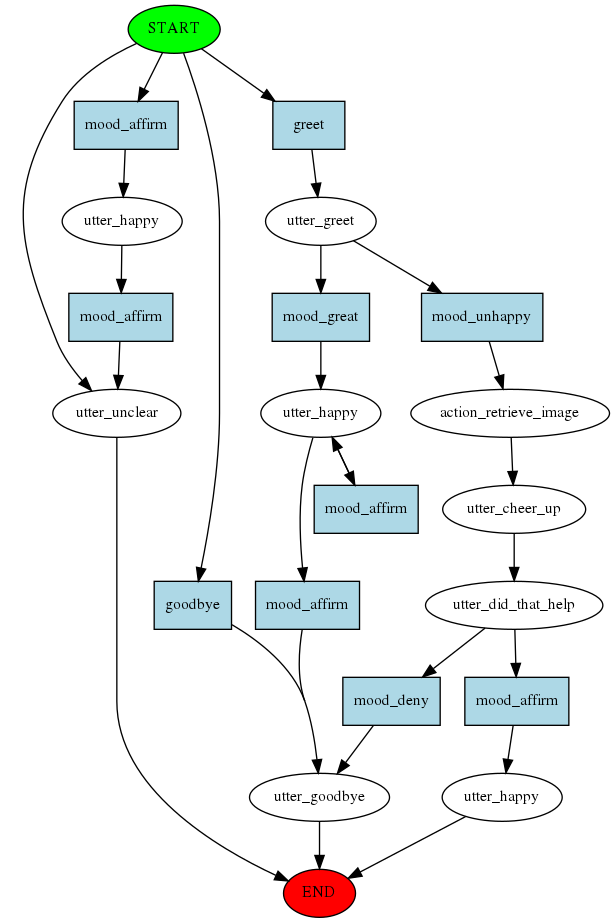

In [26]:
from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=4)
Image(filename="story_graph.png")



### Training your Dialogue Model

Now comes the fun part! We're going to show Rasa Core the stories we wrote above, and train a model on these examples. In this case, the model is a neural network implemented in Keras which learns to predict which action to take next.


In [27]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions
fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.6)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=400
)

agent.persist('models/dialogue')

Using TensorFlow backend.
/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/rasa_core/utils.py:341: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(read_file(filename, "utf-8"))
Processed Story Blocks: 100%|██████████| 6/6 [00:00<00:00, 137.40it/s, # trackers=20]
Processed actions: 161it [00:00, 681.28it/s, # examples=161]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 15)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6144      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
161/161 [==============================] - 1s 3ms/step - loss: 2.1972 - acc: 0.1491
Epoch 2/400
161/161 [==============================] - 0s 258us/step - loss: 2.1347 - acc: 0.3168
Epoch 3/400
161/161 [==============================] - 0s 229us/step - loss: 2

161/161 [==============================] - 0s 228us/step - loss: 0.7578 - acc: 0.7640
Epoch 75/400
161/161 [==============================] - 0s 244us/step - loss: 0.7508 - acc: 0.7702
Epoch 76/400
161/161 [==============================] - 0s 241us/step - loss: 0.7383 - acc: 0.8137
Epoch 77/400
161/161 [==============================] - 0s 240us/step - loss: 0.7484 - acc: 0.8261
Epoch 78/400
161/161 [==============================] - 0s 224us/step - loss: 0.7559 - acc: 0.7888
Epoch 79/400
161/161 [==============================] - 0s 213us/step - loss: 0.7177 - acc: 0.7888
Epoch 80/400
161/161 [==============================] - 0s 227us/step - loss: 0.7141 - acc: 0.7640
Epoch 81/400
161/161 [==============================] - 0s 215us/step - loss: 0.7164 - acc: 0.8075
Epoch 82/400
161/161 [==============================] - 0s 209us/step - loss: 0.7092 - acc: 0.7702
Epoch 83/400
161/161 [==============================] - 0s 216us/step - loss: 0.6736 - acc: 0.8261
Epoch 84/400
161/161 [=

161/161 [==============================] - 0s 207us/step - loss: 0.2667 - acc: 0.9317
Epoch 157/400
161/161 [==============================] - 0s 221us/step - loss: 0.2385 - acc: 0.9565
Epoch 158/400
161/161 [==============================] - 0s 175us/step - loss: 0.2328 - acc: 0.9627
Epoch 159/400
161/161 [==============================] - 0s 189us/step - loss: 0.2574 - acc: 0.9379
Epoch 160/400
161/161 [==============================] - 0s 227us/step - loss: 0.2632 - acc: 0.9565
Epoch 161/400
161/161 [==============================] - 0s 201us/step - loss: 0.2743 - acc: 0.9379
Epoch 162/400
161/161 [==============================] - 0s 193us/step - loss: 0.2470 - acc: 0.9565
Epoch 163/400
161/161 [==============================] - 0s 209us/step - loss: 0.2219 - acc: 0.9627
Epoch 164/400
161/161 [==============================] - 0s 219us/step - loss: 0.2462 - acc: 0.9752
Epoch 165/400
161/161 [==============================] - 0s 203us/step - loss: 0.2320 - acc: 0.9441
Epoch 166/400


161/161 [==============================] - 0s 197us/step - loss: 0.1126 - acc: 0.9814
Epoch 239/400
161/161 [==============================] - 0s 229us/step - loss: 0.0897 - acc: 0.9938
Epoch 240/400
161/161 [==============================] - 0s 201us/step - loss: 0.1056 - acc: 0.9938
Epoch 241/400
161/161 [==============================] - 0s 187us/step - loss: 0.0879 - acc: 0.9938
Epoch 242/400
161/161 [==============================] - 0s 200us/step - loss: 0.0901 - acc: 0.9814
Epoch 243/400
161/161 [==============================] - 0s 197us/step - loss: 0.0954 - acc: 0.9814
Epoch 244/400
161/161 [==============================] - 0s 216us/step - loss: 0.0930 - acc: 0.9876
Epoch 245/400
161/161 [==============================] - 0s 202us/step - loss: 0.0755 - acc: 0.9876
Epoch 246/400
161/161 [==============================] - 0s 197us/step - loss: 0.0801 - acc: 0.9938
Epoch 247/400
161/161 [==============================] - 0s 212us/step - loss: 0.0908 - acc: 0.9814
Epoch 248/400


161/161 [==============================] - 0s 248us/step - loss: 0.0683 - acc: 0.9938
Epoch 321/400
161/161 [==============================] - 0s 190us/step - loss: 0.0418 - acc: 0.9938
Epoch 322/400
161/161 [==============================] - 0s 192us/step - loss: 0.0489 - acc: 0.9938
Epoch 323/400
161/161 [==============================] - 0s 195us/step - loss: 0.0493 - acc: 1.0000
Epoch 324/400
161/161 [==============================] - 0s 197us/step - loss: 0.0324 - acc: 0.9938
Epoch 325/400
161/161 [==============================] - 0s 208us/step - loss: 0.0535 - acc: 0.9876
Epoch 326/400
161/161 [==============================] - 0s 195us/step - loss: 0.0408 - acc: 1.0000
Epoch 327/400
161/161 [==============================] - 0s 239us/step - loss: 0.0506 - acc: 0.9938
Epoch 328/400
161/161 [==============================] - 0s 222us/step - loss: 0.0675 - acc: 0.9876
Epoch 329/400
161/161 [==============================] - 0s 180us/step - loss: 0.0388 - acc: 1.0000
Epoch 330/400


### Starting up the bot (with NLU)

Now that we've trained the dialogue and language understanding models and saved them, we can start up an Agent which will handle conversations for us.


In [28]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)


/home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/rasa_core/utils.py:341: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(read_file(filename, "utf-8"))


### Talking to the Bot (with NLU)

We can start talking to the bot in natural language.


In [30]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hi
Hey! How are you?
not good
I am not sure what you are aiming for.
bad
looking for a good img
Here is something to cheer you up: https://picsum.photos/200/300/?random
Did that help you?
np
I am not sure what you are aiming for.
no
Great carry on!
stop
